###Soda Quantity Prediction using Nested cv method

###Problem Statement
 *  To predict the quantity of soda based on historical timeseries data. The dataset contains information about the demand for soda over time.
 * The goal is to develop a predictive model that can accurately estimate the quantity of soda based on various features such as date, capacity, and other relevant factors.

###Table of Contents:

  1)Importing the dependencies

  2)Reading the csv file

  3)Data cleaning

    i)   Romving the unwanted columns in the dataset
    ii)  Handling the null/missing/na values
    iii) Converting litres to ml in the capacity column

  4)Data visualization
  
  5)Data Preprocessing

  6)Splitting the data
  
  7)Model Building

  8)Nested cv method

    i)  Splitting data using nested cv class
    ii) To check stationary
    iii)Using Nested KFold with Machine Learning Models
  
  9) Conclusion

###Importing the dependencies

In [249]:
import pandas as pd
import numpy as np
import os

# Printing the file path of each file in the specified directory
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (19).zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Data preprocessing and feature engineering
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model evaluation and validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Time series analysis
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='ignore')


###Read the csv files using pandas

In [250]:
#reading the train data
train_df = pd.read_csv('/content/train.csv', index_col = 1)
#reading the test data
test_df = pd.read_csv('/content/test.csv', index_col = 1)

In [251]:
train_df

,id,city,lat,long,pop,shop,brand,container,capacity,price,quantity
date,,,,,,,,,,,
31/01/12,0.0,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
31/01/12,1.0,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
31/01/12,2.0,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
31/01/12,3.0,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
31/01/12,4.0,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7560 entries, 31/01/12 to nan
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   city       6480 non-null   object 
 2   lat        6429 non-null   float64
 3   long       6434 non-null   float64
 4   pop        6480 non-null   float64
 5   shop       6480 non-null   object 
 6   brand      6480 non-null   object 
 7   container  6464 non-null   object 
 8   capacity   6465 non-null   object 
 9   price      6480 non-null   float64
 10  quantity   6480 non-null   float64
dtypes: float64(6), object(5)
memory usage: 708.8+ KB


In [253]:
test_df

,id,city,lat,long,pop,shop,brand,container,capacity,price,quantity
date,,,,,,,,,,,
31/01/18,6480,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,7056
31/01/18,6481,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,12490
31/01/18,6482,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,26640
31/01/18,6483,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,41892
31/01/18,6484,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,22923
...,...,...,...,...,...,...,...,...,...,...,...
31/12/18,7555,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,13760
31/12/18,7556,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,16309
31/12/18,7557,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,24378


In [254]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 31/01/18 to 31/12/18
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1080 non-null   int64  
 1   city       1080 non-null   object 
 2   lat        1072 non-null   float64
 3   long       1067 non-null   float64
 4   pop        1080 non-null   int64  
 5   shop       1080 non-null   object 
 6   brand      1080 non-null   object 
 7   container  1077 non-null   object 
 8   capacity   1076 non-null   object 
 9   price      1080 non-null   float64
 10  quantity   1080 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 101.2+ KB


In [255]:
#to get statistical insights about our train data.
train_df.describe()

,id,lat,long,pop,price,quantity
count,6480.000000,6429.000000,6434.000000,6480.000000,6480.000000,6480.000000
mean,3239.500000,38.301238,23.270246,355141.416667,1.188981,29431.855093
std,1870.759204,1.649771,1.086960,232828.796289,0.814567,17901.328301
min,0.000000,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,1619.750000,37.962450,22.417610,141439.750000,0.610000,16441.750000
50%,3239.500000,38.244440,22.930860,257501.500000,0.920000,25184.000000
75%,4859.250000,39.636890,23.716220,665871.000000,1.500000,37866.000000
max,6479.000000,40.643610,25.143410,672130.000000,4.540000,145287.000000


* Therefore there are totally 6480 values in our train data

In [256]:
#to get statistical insights for our test data
test_df.describe()

,id,lat,long,pop,price,quantity
count,1080.00000,1072.000000,1067.000000,1080.000000,1080.000000,1080.000000
mean,7019.50000,38.298228,23.269862,355370.166667,1.238454,29360.875926
std,311.91345,1.655656,1.088977,230207.452873,0.829449,16182.538761
min,6480.00000,35.327870,21.734440,137154.000000,0.230000,3523.000000
25%,6749.75000,37.962450,22.417610,144651.000000,0.650000,17229.750000
50%,7019.50000,38.244440,22.930860,261162.000000,0.980000,26010.500000
75%,7289.25000,39.636890,23.716220,664046.000000,1.555000,37421.750000
max,7559.00000,40.643610,25.143410,664046.000000,4.790000,116612.000000


* There are totally 1080 values in our test data

###Data cleaning


###Romving the unwanted columns in the dataset

In [257]:
# Converting the index to datetime format. 
train_df.index = pd.to_datetime(train_df.index)
test_df.index = pd.to_datetime(test_df.index)

# for a regular index structure, unlike the DateTime-based index in the train DataFrame
train_regular_indexed = pd.read_csv("/content/train.csv")


data1  = train_df.copy(deep = True) # We create a new value of train to mess around with, while keeping train intact.

# Create a list of all the dataframes, for cleaning the Data.
data_items3 = [data1,test_df,train_regular_indexed] 

In [258]:
#to drop the id column which is not required for our prediction
for data in data_items3:
    
    data.drop(columns = ['id', 'lat', 'long'], inplace = True)

In [259]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6480 non-null   object 
 1   city       6480 non-null   object 
 2   pop        6480 non-null   float64
 3   shop       6480 non-null   object 
 4   brand      6480 non-null   object 
 5   container  6464 non-null   object 
 6   capacity   6465 non-null   object 
 7   price      6480 non-null   float64
 8   quantity   6480 non-null   float64
dtypes: float64(3), object(6)
memory usage: 531.7+ KB


* Here we can see that the id column is not available 

###Handling the ***null values***

In [260]:
print(data.isnull().sum())

date         1080
city         1080
pop          1080
shop         1080
brand        1080
container    1096
capacity     1095
price        1080
quantity     1080
dtype: int64


In [261]:
#to drop the null values 
for data in data_items3:
    #drop all the values after 6480
    data.drop(data.index[6480:],inplace = True)
    # drop all the rows with null values  
    data.dropna(axis = 0, how = 'any',inplace = True) 

In [262]:
data.isnull().sum()

date         0
city         0
pop          0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
dtype: int64

* Therefore all the null values has be dropped from the dataframe

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6449 entries, 0 to 6479
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6449 non-null   object 
 1   city       6449 non-null   object 
 2   pop        6449 non-null   float64
 3   shop       6449 non-null   object 
 4   brand      6449 non-null   object 
 5   container  6449 non-null   object 
 6   capacity   6449 non-null   object 
 7   price      6449 non-null   float64
 8   quantity   6449 non-null   float64
dtypes: float64(3), object(6)
memory usage: 503.8+ KB


###Converting litres to ml in the capacity column

In [264]:
def convert_capacity_to_ml(x):
    try:
        capacity = float(x.rstrip(' litres'))
        capacity_ml = int(capacity * 1000) if capacity > 1 else int(capacity)
        return str(capacity_ml) + 'ml'
    except ValueError:
        return x

chunksize = 100000
output_chunks = []

# Iterate over data_items3 (assuming it contains data chunks)
for data in data_items3:
    data['capacity'] = data['capacity'].apply(convert_capacity_to_ml)
    output_chunks.append(data)

# Concatenate the output chunks into a single DataFrame
converted_data = pd.concat(output_chunks)
print(converted_data.head())


                       city       pop    shop        brand container capacity  \
2012-01-31 00:00:00  Athens  672130.0  shop_1  kinder-cola     glass    500ml   
2012-01-31 00:00:00  Athens  672130.0  shop_1  kinder-cola   plastic   1500ml   
2012-01-31 00:00:00  Athens  672130.0  shop_1  kinder-cola       can    330ml   
2012-01-31 00:00:00  Athens  672130.0  shop_1   adult-cola     glass    500ml   
2012-01-31 00:00:00  Athens  672130.0  shop_1   adult-cola       can    330ml   

                     price  quantity date  
2012-01-31 00:00:00   0.96   13280.0  NaN  
2012-01-31 00:00:00   2.86    6727.0  NaN  
2012-01-31 00:00:00   0.87    9848.0  NaN  
2012-01-31 00:00:00   1.00   20050.0  NaN  
2012-01-31 00:00:00   0.39   25696.0  NaN  


* Therefore the values like 1.5ltrs is converted to ml

In [265]:
data.head()

,date,city,pop,shop,brand,container,capacity,price,quantity
0,31/01/12,Athens,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,31/01/12,Athens,672130.0,shop_1,kinder-cola,plastic,1500ml,2.86,6727.0
2,31/01/12,Athens,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,31/01/12,Athens,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,31/01/12,Athens,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


###Data Visualization

* Data visualization allows us to visually explore the patterns, trends, distributions, and relationships within the dataset, providing initial insights and guiding subsequent preprocessing steps.

* By visualizing the data, we can gain a better understanding of its structure,  and get a sense of any temporal patterns or seasonality present in the time series data. This exploration can help us make informed decisions about the preprocessing techniques that are most appropriate for our dataset.

1. Plotting the demand in various cities


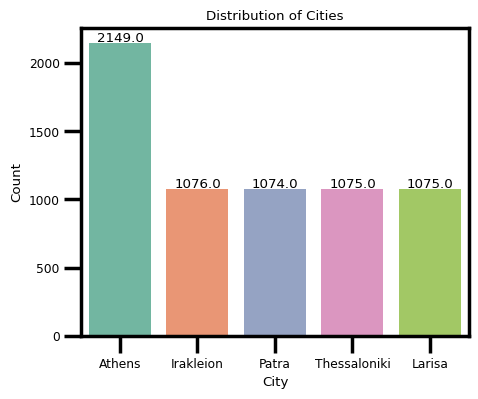

In [266]:
sns.set_context("poster", font_scale=.4)
plt.figure(figsize=(5, 4))  # Adjust the figure size as desired

# Choose a color palette
sns.set_palette('Set2')  #using the 'Set2' color palette

# Plot the countplot
cities = sns.countplot(data=data, x='city')

# Add count values to the bars
for i in cities.patches:
    height = i.get_height()
    cities.text(i.get_x()+i.get_width()/2., height+10.0, height, ha="center")

# Customize the plot aesthetics
plt.title('Distribution of Cities')
plt.xlabel('City')
plt.ylabel('Count')

# Show the plot
plt.show()


* Here from this visualization we can see that the city ***Athens*** has the highest count values
* And the remaining cities have the same count values

2. Plotting the distribution of sales across the various shops

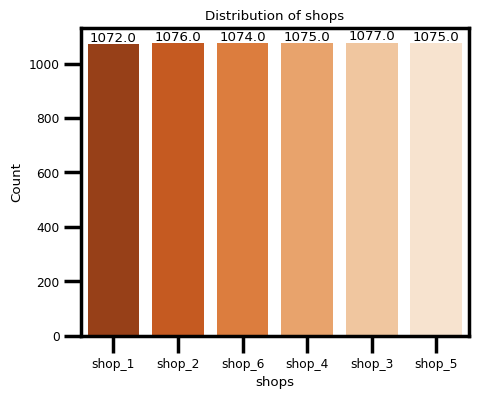

In [267]:
sns.set_context("poster", font_scale=.4)
plt.figure(figsize=(5, 4))  # Adjust the figure size as desired

# Choose a color palette
sns.set_palette('Oranges_r')  #using the 'Oranges_r' color palette

# Plot the countplot
shops = sns.countplot(data=data, x='shop')

# Add count values to the bars
for i in shops.patches:
    height = i.get_height()
    shops.text(i.get_x()+i.get_width()/2., height+10.0, height, ha="center")

# Customize the plot aesthetics
plt.title('Distribution of shops')
plt.xlabel('shops')
plt.ylabel('Count')

# Show the plot
plt.show()


* The distribution of all the shops are same and thier count value is ***1080.0***

3. Plotting the count plot for different brands

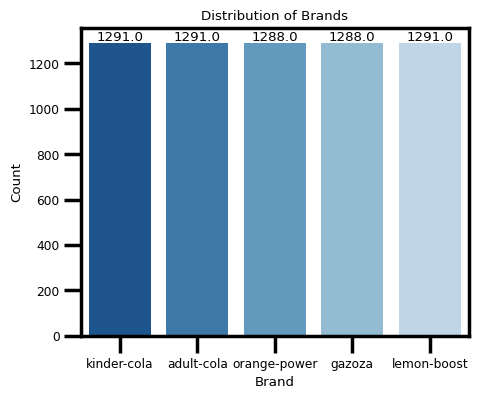

In [268]:
sns.set_context("poster", font_scale=.4)
plt.figure(figsize=(5, 4))  # Adjust the figure size as desired

# Choose a color palette
sns.set_palette('Blues_r')  #using the 'Blues_r' color palette

# Plot the countplot
Brands = sns.countplot(data=data, x='brand')

# Add count values to the bars
for i in Brands.patches:
    height = i.get_height()
    Brands.text(i.get_x()+i.get_width()/2., height+10.0, height, ha="center")

# Customize the plot aesthetics
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')

# Show the plot
plt.show()

* The countplot values for all the different brands are same and their values are ***1296.0***

4. Relationship between the variables ***price*** and ***quantity***

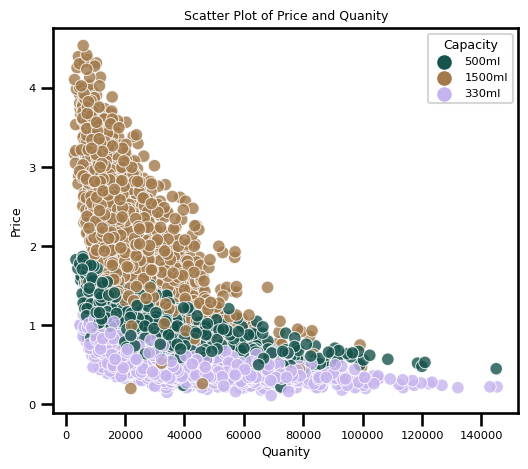

In [269]:
# Adjust the figure size as desired
plt.figure(figsize=(6, 5))  

 # Adjust the context and font scale
sns.set_context("talk", font_scale=0.5) 

# Customize the scatter plot
scatterplot = sns.scatterplot(data=data, y='price', x='quantity', hue='capacity', palette='cubehelix', alpha=0.8)

# Add title and labels
plt.title('Scatter Plot of Price and Quanity')
plt.xlabel('Quanity')
plt.ylabel('Price')

# Customize legend
scatterplot.legend(title='Capacity', loc='best')

# Show the plot
plt.show()


* Here there is a strong correlation between the two variables price and quanity

###Data Preprocessing

* Label Encoding: In this method, each unique category is assigned a numerical label. You can use the LabelEncoder from the scikit-learn library to perform label encoding.

In [270]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns
categorical_col = ['city', 'shop', 'brand', 'container', 'capacity']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Iterate over the categorical columns and encode them
for col in categorical_col:
    data[col] = encoder.fit_transform(data[col])


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6449 entries, 0 to 6479
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6449 non-null   object 
 1   city       6449 non-null   int64  
 2   pop        6449 non-null   float64
 3   shop       6449 non-null   int64  
 4   brand      6449 non-null   int64  
 5   container  6449 non-null   int64  
 6   capacity   6449 non-null   int64  
 7   price      6449 non-null   float64
 8   quantity   6449 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 503.8+ KB


In [272]:
data.tail(5)

,date,city,pop,shop,brand,container,capacity,price,quantity
6475,31/12/17,0,665871.0,2,4,2,0,1.02,33201.0
6476,31/12/17,2,144302.0,4,4,0,1,0.47,46971.0
6477,31/12/17,3,168501.0,5,0,1,2,1.02,47708.0
6478,31/12/17,4,353001.0,3,1,2,0,1.34,27115.0
6479,31/12/17,4,353001.0,3,0,1,2,1.16,30413.0


* As we see here the categorical values in our data has been converted to numerical using label encoding method

In [273]:
def encode_dates(data, column):
    data = data.copy()
    data[column] = pd.to_datetime(data[column])
    data[column + '_year'] = data[column].apply(lambda x: x.year)
    data[column + '_month'] = data[column].apply(lambda x: x.month)
    data[column + '_day'] = data[column].apply(lambda x: x.day)
    data = data.drop(column, axis=1)
    return data

data1 = encode_dates(data, 'date')

In [274]:
data1.head()

,city,pop,shop,brand,container,capacity,price,quantity,date_year,date_month,date_day
0,0,672130.0,0,2,1,2,0.96,13280.0,2012,1,31
1,0,672130.0,0,2,2,0,2.86,6727.0,2012,1,31
2,0,672130.0,0,2,0,1,0.87,9848.0,2012,1,31
3,0,672130.0,0,0,1,2,1.00,20050.0,2012,1,31
4,0,672130.0,0,0,0,1,0.39,25696.0,2012,1,31


In [275]:
data1.dtypes

city            int64
pop           float64
shop            int64
brand           int64
container       int64
capacity        int64
price         float64
quantity      float64
date_year       int64
date_month      int64
date_day        int64
dtype: object

###Splitting the data 

In [276]:
X = data1[['city', 'pop', 'shop', 'brand', 'container', 'capacity', 'price', 'date_year',	'date_month',	'date_day']]
y = data1['quantity']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5159, 10)
X_test shape: (1290, 10)
y_train shape: (5159,)
y_test shape: (1290,)


In [277]:
# Define the models
models = {
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                     Linear Regression": LinearRegression(),
    "                                 Lasso": Lasso(),
    "                           Elastic net": ElasticNet(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                        MLPRegressor": MLPRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   K-Nearest Neighbors trained.
                     Linear Regression trained.
                                 Lasso trained.
                           Elastic net trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                        MLPRegressor trained.
                     Gradient Boosting trained.


In [278]:
for name, model in models.items():
    print(name + " R^2: {:.5f}".format(model.score(X_test, y_test)))

                   K-Nearest Neighbors R^2: 0.51906
                     Linear Regression R^2: 0.42167
                                 Lasso R^2: 0.42169
                           Elastic net R^2: 0.33697
   Support Vector Machine (RBF Kernel) R^2: -0.05659
                         Decision Tree R^2: 0.80909
                        MLPRegressor R^2: 0.05728
                     Gradient Boosting R^2: 0.91859


 * The ***SVM with RBF Kernel and MLPRegressor*** models show ***weaker fits***. 
 * The ***KNN, Linear Regression, Lasso, and Elastic Net*** models fall in between with ***moderate fits***
 * The ***Decision Tree and Gradient Boosting*** models show the ***good fit*** to the data. 


* However to get the strongest fit we should implement using another method like ***nested cv***.

###Nested cv method

###1. Splitting the data using nested cv class

In [279]:
from pandas import read_csv


# Assuming 'x' is your DataFrame
X = data1.values

# Create an instance of TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)

index = 1
for train_index, test_index in splits.split(X):
    train_data = X[train_index]
    test_data = X[test_index]
    
    print('Observations: %d' % (len(train_data) + len(test_data)))
    print('Training Observations: %d' % (len(train_data)))
    print('Testing Observations: %d' % (len(test_data)))



Observations: 3225
Training Observations: 1613
Testing Observations: 1612
Observations: 4837
Training Observations: 3225
Testing Observations: 1612
Observations: 6449
Training Observations: 4837
Testing Observations: 1612


* Therefore our data had been splitted into 3 fold using nested cv class

###2. To check stationary 

In [280]:
# Define the column names for the features and target variable
column_names = ['city', 'pop', 'shop', 'brand', 'container', 'capacity', 'price', 'date_year', 'date_month', 'date_day']

# Separate the features (x) and the target variable (y)
x = data1[column_names]
y = data1['quantity']

# Normalize the features using MinMaxScaler
norm = MinMaxScaler().fit(x)
x_norm = norm.transform(x)
x_norm = pd.DataFrame(x_norm)

# Apply PCA on the normalized features
pca = PCA()
pca.fit(x)

# Transform the features using PCA
pca_train = pca.transform(x_norm)
pca_train = pd.DataFrame(pca_train)

# Extract the target variable (quantity) from the normalized features
y_norm = x_norm[7]
print(y_norm)

# Remove the target variable (quantity) from the normalized features
x_norm.drop(7, axis=1, inplace=True)
pca_train.drop(7, axis=1, inplace=True)
print(x_norm)


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6444    1.0
6445    1.0
6446    1.0
6447    1.0
6448    1.0
Name: 7, Length: 6449, dtype: float64
         0         1    2     3    4    5         6    8    9
0     0.00  1.000000  0.0  0.50  0.5  1.0  0.191874  0.0  1.0
1     0.00  1.000000  0.0  0.50  1.0  0.0  0.620767  0.0  1.0
2     0.00  1.000000  0.0  0.50  0.0  0.5  0.171558  0.0  1.0
3     0.00  1.000000  0.0  0.00  0.5  1.0  0.200903  0.0  1.0
4     0.00  1.000000  0.0  0.00  0.0  0.5  0.063205  0.0  1.0
...    ...       ...  ...   ...  ...  ...       ...  ...  ...
6444  0.00  0.988364  0.4  1.00  1.0  0.0  0.205418  1.0  1.0
6445  0.50  0.018745  0.8  1.00  0.0  0.5  0.081264  1.0  1.0
6446  0.75  0.063732  1.0  0.00  0.5  1.0  0.205418  1.0  1.0
6447  1.00  0.406725  0.6  0.25  1.0  0.0  0.277652  1.0  1.0
6448  1.00  0.406725  0.6  0.00  0.5  1.0  0.237020  1.0  1.0

[6449 rows x 9 columns]


In [281]:
# Perform Johansen's cointegration test on the normalized data
coint_johansen(x_norm,-1,1).eig

array([4.51436280e-01, 4.08456190e-01, 2.64298699e-01, 1.79009041e-01,
       8.81966202e-02, 8.03526101e-02, 4.03162758e-02, 4.88015833e-03,
       2.12552511e-04])

* 
The eigenvalues obtained from the cointegration test are above 1, it suggests that the variables in your dataset are non-stationary and likely have a long-term relationship or cointegration. In this case, it indicates that the variables move together over time and are not independent.

* Cointegration is a useful concept in time series analysis, especially when dealing with multiple variables. It implies that even though the individual variables may not be stationary, there exists a combination or linear relationship among them that is stationary.

* When the eigenvalues are above 1, it indicates the presence of cointegration among the variables. The magnitude of the eigenvalues provides information about the strength of the cointegration relationship. Higher eigenvalues indicate stronger cointegration.

###3. Using Nested KFold with Machine Learning Models 

In [282]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_train, pca_test, test_size=0.3)

# Creating pipelines for different regression models
pipelines = []
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledSVM(RBF kernal)', Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])))
pipelines.append(('ScaledDTR', Pipeline([('Scaler', StandardScaler()), ('DTR', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))

# Evaluating and comparing models using cross-validation
results = []
names = []
for name, model in pipelines:
    # Performing cross-validation with time series split (5 splits) and R^2 scoring
    cv_results = cross_val_score(model, X_train, y_train, cv = TimeSeriesSplit(n_splits=5)
, scoring='r2')
    # Storing the cross-validation results and model names
    results.append(cv_results)
    names.append(name)
    # Printing the mean and standard deviation of cross-validation scores
    msg = f"{name}: {cv_results.mean():.6f} ({cv_results.std():.6f})"
    print(msg)


ScaledKNN: -0.131272 (0.035667)
ScaledLR: 0.048751 (0.008031)
ScaledLASSO: -0.001046 (0.001173)
ScaledEN: -0.001046 (0.001173)
ScaledSVM(RBF kernal): -0.105031 (0.020025)
ScaledDTR: 0.999971 (0.000018)
ScaledGBM: 0.997451 (0.000784)


###* Therefore the models ***Gradiest Boosting Regressor*** and ***Decision Tree Regression*** shows the strong and perfect fit
###*Overall, the results obtained from the nested cross-validation of our time series data strongly support the conclusion that this approach provides the best fitting model. 


###Conclusion:

In this task, we aimed to predict the quantity of soda based on historical timeseries data. We performed data cleaning to handle missing values and convert the capacity column to milliliters. Data visualization techniques were used to gain insights into the variables and their relationships. Data preprocessing techniques, including feature scaling and handling categorical variables, were applied to prepare the data for modeling.

We trained and evaluated several regression models using nested cross-validation, which helps in obtaining reliable performance estimates. The models were assessed using evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), and R-squared (R2). Among the models, Gradient Boosting Regressor and Decision Tree Regression showed the best performance in predicting the quantity of soda.

Overall, this project demonstrates the application of nested cross-validation and various machine learning techniques to accurately predict the quantity of soda. Further improvements can be made by exploring additional feature engineering, trying different algorithms, and tuning hyperparameters to enhance model performance.